# Introduction to ScikitLearn (sklearn- indepth)
This notebook demonstrates some of the most useful functions of the SKLean library

In [1]:
what_to_cover = [
"0. An end-to-end sklearn workflow",
"1. Getting the data ready",
"2. Choose the right estimator/algorithm for our problems",
"3. Fit the model/algorithm and use it to make predictions on our data",
"4. Evaluating a model",
"5. Improve the model",
"6. Save and load the trained model",
"7. Putting it all together!" ]
what_to_cover

['0. An end-to-end sklearn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve the model',
 '6. Save and load the trained model',
 '7. Putting it all together!']

In [95]:
# Imports--
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

## 1. Getting our data ready to be used with Machine Learning
    Three main things to do:
        1. Split data into features and labels ('X' and 'y').
        2. Converting non-numerical values to numerical values (aka feature encoding)
        3. Filling (aka imputing) or disregarding missing values.
        

In [3]:
heart_disease = pd.read_csv("./data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### 1.1 Split data into features and labels

In [4]:
X = heart_disease.drop("target", axis = 1) #  every column except target. 
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y= heart_disease["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
# Split the data into training and test sets. (imported train_test_split for this.) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.2 Make sure it is all numerical

In [8]:
car_sales= pd.read_csv("./data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [10]:
#UNDERSTANDING WHY WE NEED NUMERICAL
#split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]
#Split into training and testing
    # X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

#Build ML model-
    # imported RandomForestRegressor for this

    # model = RandomForestRegressor()
    # model.fit(X_train, y_train)
    # model.score(X_test, y_test)
#THis will yeild a ValueError: could not convert string to float: 'Honda'

In [11]:
#CONVERT data to NUMBERS
#imported OneHotEncoder & ColumnTransformer for this
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], 
                                remainder = "passthrough")
transformed_X =transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [12]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


### 1.3 Filling- Deal with missing values
1. Fill them with some value (Imputation)
2. Remove samples with missing data.

In [13]:
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [14]:
car_sales_missing.isna().sum() #total missing values

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [15]:
#THIS WILL THROW AN ERROR FORM SOME OLDER SKLEARN VERSIONS
#it doesnt, for me.
#split into X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
#CONVERT data to NUMBERS
#imported OneHotEncoder & ColumnTransformer for this
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], 
                                remainder = "passthrough")
transformed_X =transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill missing data with Pandas

In [16]:
#FIll make column
car_sales_missing["Make"].fillna("missing", inplace = True)

#Fill Colour column
car_sales_missing["Colour"].fillna("missing", inplace = True)

#Fill Odometer
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

#FIll Doors
car_sales_missing["Doors"].fillna(4, inplace = True)

In [17]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [18]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace = True)

In [19]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [20]:
len(car_sales_missing)

950

In [21]:
#THIS WILL THROW AN ERROR FORM SOME OLDER SKLEARN VERSIONS
#it doesnt, for me.
#split into X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
#CONVERT data to NUMBERS
#imported OneHotEncoder & ColumnTransformer for this
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], 
                                remainder = "passthrough")
transformed_X =transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

### Option 2: Fill missing values with SKLearn

In [22]:
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [23]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [24]:
car_sales_missing.dropna(subset=["Price"], inplace= True)
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [25]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [26]:
    # Split into X/y
X= car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
X,y

(       Make Colour  Odometer (KM)  Doors
 0     Honda  White        35431.0    4.0
 1       BMW   Blue       192714.0    5.0
 2     Honda  White        84714.0    4.0
 3    Toyota  White       154365.0    4.0
 4    Nissan   Blue       181577.0    3.0
 ..      ...    ...            ...    ...
 995  Toyota  Black        35820.0    4.0
 996     NaN  White       155144.0    3.0
 997  Nissan   Blue        66604.0    4.0
 998   Honda  White       215883.0    4.0
 999  Toyota   Blue       248360.0    4.0
 
 [950 rows x 4 columns],
 0      15323.0
 1      19943.0
 2      28343.0
 3      13434.0
 4      14043.0
         ...   
 995    32042.0
 996     5716.0
 997    31570.0
 998     4001.0
 999    12732.0
 Name: Price, Length: 950, dtype: float64)

In [27]:
#Fill missing values with sk-learn
# SimpleImputer & ColumnTransformer for this.

# Fill categorical values with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy = "constant", fill_value= "missing")
door_imputer = SimpleImputer(strategy="constant", fill_value= 4)
numerical_imputer= SimpleImputer(strategy= "mean")

#Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
numerical_features= ["Odometer (KM)"]

#Create an imputer (something that fills missing data.)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("numerical_imputer", numerical_imputer, numerical_features)
])
#Transform data
filled_X= imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [28]:
car_sales_filled = pd.DataFrame(filled_X, 
                                columns= ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [29]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [30]:
#Split car_Sales_filled in X/y

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], 
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [31]:
#Now we have our data as numbers
#lets fit a model
# using randomforestregressor, train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size= 0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2299643775656719

In [32]:
what_to_cover

['0. An end-to-end sklearn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve the model',
 '6. Save and load the trained model',
 '7. Putting it all together!']

## 2. Choosing the right estimator/algorithm/model for our problems

* Classification: Predicting whether a sample is one thing or another.
* Regression: Predicting a number

### 2.1 Picking machine learning model for a regresssion problem


In [33]:
#Using boston housing datasset for this load_boston
boston = load_boston()
bostonDF = pd.DataFrame(boston["data"], columns= boston["feature_names"])
bostonDF["target"] = pd.Series(boston["target"])
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [34]:
len(bostonDF)

506

In [35]:
#trying the Ridge Regression Model
#set up random seed
np.random.seed(42)
X= bostonDF.drop("target", axis = 1)
y = bostonDF["target"]
#split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

#Instantiate ridge model
model = Ridge()
model.fit(X_train, y_train)

#check score of ridge on test
model.score(X_test, y_test)

0.6662221670168522

In [36]:
# how to make this better?
#what if ridge wasnt working?
#we would use Ensemble models- like RandomForestRegressor or RandomForestClassifier
#Ensemble models is a machine learning approach to combine multiple other models in the prediction process.

In [37]:
np.random.seed(42)
X= bostonDF.drop("target", axis=1)
y= bostonDF["target"]
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8654448653350507

## 2.2 Picking machine learning model for a classification problem

In [38]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [39]:
# Consulting map. it says to try LinearSVC- imported

In [40]:
np.random.seed(42)
X= heart_disease.drop("target", axis= 1)
y = heart_disease["target"]
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)
clf = LinearSVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [41]:
#Using Ensemble Methods- RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.2)
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.8524590163934426

Tidbit: 
    1. if you have structured data use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning.

## 3. Fit the model/algorithm on our data and use it to make predictions.

### 3.1 Fitting the model to the data
X = features, feature variables, data. 
y = labels, targets, target variables

In [42]:
#Using Ensemble Methods- RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target", axis=1)
y = heart_disease["target"]
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.2)
clf1 = RandomForestClassifier()
#fit the model into the data- Looking at X-data and figuring out we got to y-values
clf1.fit(X_train, y_train)
#Use patterns the model has learned.
clf1.score(X_test, y_test)

0.8524590163934426

### 3.2 Making predictions machine learning models.
2 main ways to make predictions:
1. predict()
2. predict_proba()

In [43]:
# Use a trained model to make predictions
clf.predict(X_test) # neeed the exact same type of data that the model has learned on.

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
#compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [45]:
clf.score(X_test, y_test)

0.8688524590163934

In [46]:
# make predictions with predict_proba()
#predict_proba returns probabilities of a classifacation label.
clf._predict_proba_lr(X_test[:5]) #gives chances of the target being 0 or 1.

array([[0.61990682, 0.38009318],
       [0.31915885, 0.68084115],
       [0.24886537, 0.75113463],
       [0.71506712, 0.28493288],
       [0.28459539, 0.71540461]])

In [47]:
# lets predict on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [48]:
np.random.seed(42)
#create data
X= bostonDF.drop('target', axis= 1)
y = bostonDF["target"];
#split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = RandomForestRegressor().fit(X_train, y_train)

#make predictions
y_preds = model.predict(X_test)


In [49]:
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [50]:
np.array(y_test)

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [51]:
#Compare the predictions to the truth
#import mean_absolute_error from sklearn.metrics
mean_absolute_error(y_test, y_preds) #finds the difference btween two predictions
#on average the predictions vary from the target by 2.1

2.136382352941176

In [52]:
what_to_cover

['0. An end-to-end sklearn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve the model',
 '6. Save and load the trained model',
 '7. Putting it all together!']

## 4. Evaluating a Machine learning model
Three ways to evaluate sklearn models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with score method

In [53]:
#working with the heart disease model
#import randomforest classifier
np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
clf.score(X_test, y_test)

0.8524590163934426

In [55]:
clf.score(X_train, y_train)

1.0

In [56]:
# Same as above but for regressor

In [57]:
np.random.seed(42)
#create data
X= bostonDF.drop('target', axis= 1)
y = bostonDF["target"];
#split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = RandomForestRegressor().fit(X_train, y_train)
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluting a model using the scoring parameter

In [58]:
#imported cross_val_score for this from sklearn.model_selection

In [59]:
#classifiction model

np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
clf = RandomForestClassifier()
clf.fit(X_train, y_train);




In [60]:
clf.score(X_test, y_test)

0.8524590163934426

In [61]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [62]:
np.random.seed(42)
clf_single_score = clf.score(X_test,y_test)
#take mean of 5fold cross val score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y))
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [63]:
#Default scoring parameter of classifier = mean accuracy

In [64]:
#Scoring parameter set to null by default
cross_val_score(clf,X,y,cv = 5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model metrics:
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

### Accuracy

In [70]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
#using cross_val_scpre, RandomForestClassifier

np.random.seed(42)
X= heart_disease.drop("target", axis = 1)
y= heart_disease["target"]
clf = RandomForestClassifier()
cross_val_score_heart_disease = cross_val_score(clf,X,y, cv= 5)
cross_val_score_heart_disease

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [69]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score_heart_disease) * 100:.2f}%")

Heart Disease Classifier Cross-validated Accuracy: 82.48%


### Area under the ROC (Receiver Operating Characteristic) curve (AUC/ROC)
* Area under curve(AUC)
* ROC curve

ROC curves are a comparasion of a model's true positive rate(tpr) versus a model's false positive rate(fpr)
* Truth positive: Model predicts 1 and truth is 1
* False positive: Model predicts 1 and truth is 0
* True negative: Model predicts 0 and truth is 0
* False negative: Model predicts 0 and truth is 1

In [74]:
#create X_train, test, y_train, test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
#Import roc_curve form sklearn.metrics
y_probs = clf.predict_proba(X_test)

y_probs

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.16, 0.84],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.32, 0.68],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.83, 0.17],
       [0.72, 0.28],
       [0.79, 0.21],
       [0.1 , 0.9 ],
       [0.31, 0.69],
       [0.06, 0.94],
       [0.34, 0.66],
       [0.27, 0.73],
       [0.57, 0.43],
       [0.77, 0.23],
       [0.22, 0.78],
       [0.14, 0.86],
       [0.92, 0.08],
       [0.48, 0.52],
       [0.22, 0.78],
       [0.99, 0.01],
       [0.35, 0.65],
       [0.67, 0.33],
       [0.88, 0.12],
       [0.91, 0.09],
       [0.84, 0.16],
       [0.73, 0.27],
       [0.18, 0.82],
       [0.97, 0.03],
       [0.33, 0.67],
       [0.31, 0.69],
       [0.32, 0.68],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.26, 0.74],
       [0.57, 0.43],
       [0.63, 0.37],
       [0.71, 0.29],
       [0.02, 0.98],
       [0.28, 0.72],
       [0.58, 0.42],
       [0.2 , 0.8 ],
       [0.97,

In [77]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.06, 0.58, 0.84, 0.5 , 0.75, 0.76, 0.68, 0.93, 0.01, 1.  ])

In [78]:
# Calculate fpr, tpr and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.08, 0.12, 0.12,
       0.12, 0.12, 0.6 , 0.64, 0.76, 0.88, 0.96, 1.  ])

In [80]:
#Create function for plotting ROC curves:
# import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr) and true positive rate(tpr).
    """
    plt.plot(fpr, tpr, color="orange", label= "ROC")
    #plot the line with no predictive power(baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    #Customize
    plt.xlabel("False Positive Rate(fpr)")
    plt.ylabel("True Positive Rate(tpr)")
    plt.title("Reciever Operating Charateristic (ROC) curve")
    plt.legend()
    plt.show();

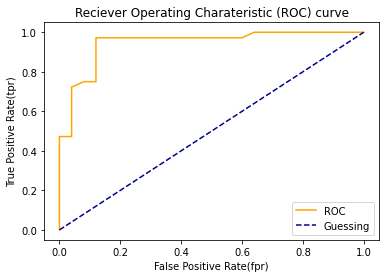

In [81]:
plot_roc_curve(fpr, tpr)

In [83]:
#imported roc_auc_score to get the score-
roc_auc_score(y_test, y_probs_positive)

0.9444444444444445

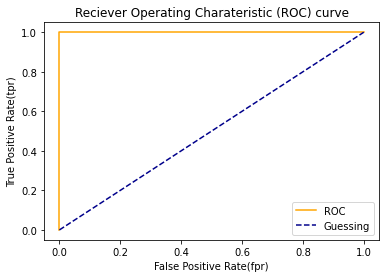

In [84]:
# Plot the perfect ROC curve and AUC curve
fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [85]:
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict
In essence, giving you an idea of where the model is getting confused

In [88]:
#import confusion matrix

y_preds = clf.predict(X_test)
confusion_matrix(y_test, y_preds)

array([[22,  3],
       [ 5, 31]], dtype=int64)

In [89]:
#Visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames= ["Actual Labels"],
           colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,22,3
1,5,31


<AxesSubplot:>

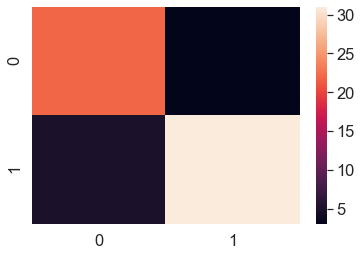

In [91]:
#make confusion matrix more visual with seaborn heatmap
# import seaborn as sns


#set the font scale
sns.set(font_scale = 1.5)

#create confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat)

In [92]:
def plot_conf_mat(conf_mat):
    """
    PLot a confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat, annot = True, #Annotate the boxes with conf_mat info
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

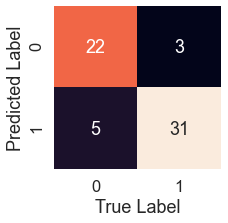

In [93]:
plot_conf_mat(conf_mat)

### Classification Report

In [96]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [97]:
#Where precision and revall(Other metrics than accuracy) become valuable
disease_true = np.zeros(1000) #1000 peole with no disease
disease_true[0] = 1 #One person was diagnosed

disease_preds = np.zeros(1000) #model predicts every case as 0
pd.DataFrame(classification_report(disease_true, disease_preds, output_dict = True))

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000
